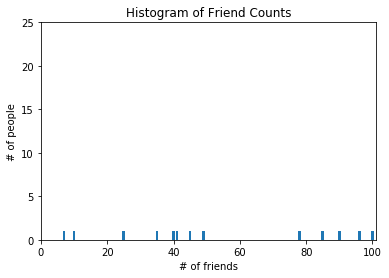

In [3]:
#STATICS 

# we use statistics to distill and communicate relevant features of our data.

import collections
from collections import Counter
from matplotlib import pyplot as plt

num_friends = [100,49,41,40,25,96,35,78,85,10,45,7,90] 
friend_counts = Counter(num_friends)
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [4]:
# “Probably the simplest statistic is simply the number of data points:”

num_points = len(num_friends)               # 13

In [5]:
print(num_points)

13


In [6]:
# “You’re probably also interested in the largest and smallest values:”

largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 7

In [7]:
print(largest_value)
print(smallest_value)

100
7


In [8]:
# which are just special cases of wanting to know the values in specific positions:

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           
second_smallest_value = sorted_values[1]    
second_largest_value = sorted_values[-2]    

In [9]:
print(sorted_values)
print(smallest_value)
print(second_smallest_value)
print(second_largest_value)

[7, 10, 25, 35, 40, 41, 45, 49, 78, 85, 90, 96, 100]
7
10
96


In [10]:
# CENTRAL TENDENCIES 

# Usually, we’ll want some notion of where our data is centered. 
# Most commonly we’ll use the mean (or average), which is just the sum of the data divided by its count

# this isn't right if you don't from __future__ import division

from __future__ import division

def mean(x):
    return sum(x) / len(x)

mean(num_friends)

53.92307692307692

In [11]:
# We’ll also sometimes be interested in the median, 
# which is the middle-most value (if the number of data points is odd) 
# or the average of the two middle-most values (if the number of data points is even).


def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

median(num_friends)

45

In [12]:
# A generalization of the median is the quantile, which represents the value less than which a certain percentile
# of the data lies. (The median represents the value less than which 50% of the data lies.)

def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

quantile(num_friends, 0.10) 
quantile(num_friends, 0.25) 
quantile(num_friends, 0.75) 
quantile(num_friends, 0.90) 

96

In [13]:
# Less commonly you might want to look at the mode, or most-common value[s]

import collections

def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems()
            if count == max_count]

mode(num_friends)

[96, 35, 100, 7, 40, 41, 10, 45, 78, 49, 85, 25, 90]

In [15]:
# A more complex measure of dispersion is the variance, which is computed as:

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i
               for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)


def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

1044.2435897435896

In [16]:
# DISPERSION 

# Dispersion refers to measures of how spread out our data is.
# Typically they’re statistics for which values near zero signify not spread out at all 
# and for which large values (whatever that means) signify very spread out.
# For instance, a very simple measure is the range, which is just the difference between the largest 
# and smallest elements:

# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

93

In [17]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i
               for v_i, w_i in zip(v, w))

In [18]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [19]:
# “A more complex measure of dispersion is the variance, which is computed as:”

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

1044.2435897435896

In [20]:
# The variance, on the other hand, has units that are the square of the original units (e.g., “friends squared”). 
# As it can be hard to make sense of these, we often look instead at the standard deviation:

import math

def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

32.314758079607984

In [21]:
#  A more robust alternative computes the difference between the 75th percentile value and the 25th percentile value
# which is quite plainly unaffected by a small number of outliers.”

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

50

In [38]:
# COVARIANCE

# Whereas variance measures how a single variable deviates from its mean, 
# covariance measures how two variables vary in tandem from their means

#def covariance(x, y):
    #n = len(x)
    #return dot(de_mean(x), de_mean(y)) / (n - 1)

#covariance(num_friends, daily_minutes)

In [22]:
# Correlation divides out the standard deviations of both variables

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero        